In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("train2.csv")

In [3]:
data = np.array(df)
m,n = data.shape
np.random.shuffle(data)
print(f"m:{m}")
print(f"n:{n}")

m:42000
n:785


In [4]:
df.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
val_data = data[0 : 2000].T
Y_val = val_data[0]
X_val = val_data[1 : n]
X_val = X_val / 255.

train_data = data[2000 : m].T
Y_train = train_data[0]
X_train = train_data[1 : n]
X_train = X_train / 255.

In [6]:
print(X_train.shape)
print(Y_train.shape)
print(X_val.shape)
print(Y_val.shape)

(784, 40000)
(40000,)
(784, 2000)
(2000,)


In [7]:
n_classes = len(set(Y_train))
print(n_classes)

10


In [8]:
from src.parameter_initialization import ParameterInitialization
from src.forward_propagation import ForwardPropagationForClassification
from src.back_propagation import BackPropagationForClassification
from src.cost_function import UpdateParameters
from src.evaluation import Evaluation
from src.visualization import Visualization

In [9]:
n_layers = 2
n_neurons_per_layer = 300

In [10]:
forward_propagation = ForwardPropagationForClassification()
back_propagation = BackPropagationForClassification()
update_parameters = UpdateParameters()
evaluation = Evaluation()
visualization  = Visualization()
parameter_init = ParameterInitialization(X_train.shape[0], n_layers, n_neurons_per_layer, n_classes)

In [11]:
weights, biases = parameter_init.initialize_parameters()

In [12]:
visualization.plot_neural_network_architecture(X_train.shape[0], n_layers, n_neurons_per_layer, n_classes)

In [13]:
epochs = 100
learning_rate = 0.1

In [14]:
accuracies = []

for i in range(epochs):
    forward_output = forward_propagation.forward_propagation_classification(weights, biases, X_train)
    back_output = back_propagation.back_propagation_classification(forward_output, weights, X_train, Y_train, m)
    derivatives = {key: value for key, value in back_output.items() if key.startswith('d')}
    weights, biases = update_parameters.update_parameters(weights, biases, derivatives, learning_rate)
    
    key, value = list(forward_output.items())[-1]

    prediction = evaluation.predictions(value)
    accuracy = evaluation.accuracy(prediction, Y_train)
    accuracies.append(accuracy)

    if i % 10 == 0:
        print("Epoch:", i)
        print(f"Accuracy: {accuracy * 100}")
        print("~~~~~~~~~~~~~~~~~")

Epoch: 0
Accuracy: 11.5025
~~~~~~~~~~~~~~~~~
Epoch: 10
Accuracy: 69.99
~~~~~~~~~~~~~~~~~
Epoch: 20
Accuracy: 77.13499999999999
~~~~~~~~~~~~~~~~~
Epoch: 30
Accuracy: 80.4375
~~~~~~~~~~~~~~~~~
Epoch: 40
Accuracy: 82.49499999999999
~~~~~~~~~~~~~~~~~
Epoch: 50
Accuracy: 84.0325
~~~~~~~~~~~~~~~~~
Epoch: 60
Accuracy: 85.155
~~~~~~~~~~~~~~~~~
Epoch: 70
Accuracy: 86.045
~~~~~~~~~~~~~~~~~
Epoch: 80
Accuracy: 86.81750000000001
~~~~~~~~~~~~~~~~~
Epoch: 90
Accuracy: 87.41499999999999
~~~~~~~~~~~~~~~~~


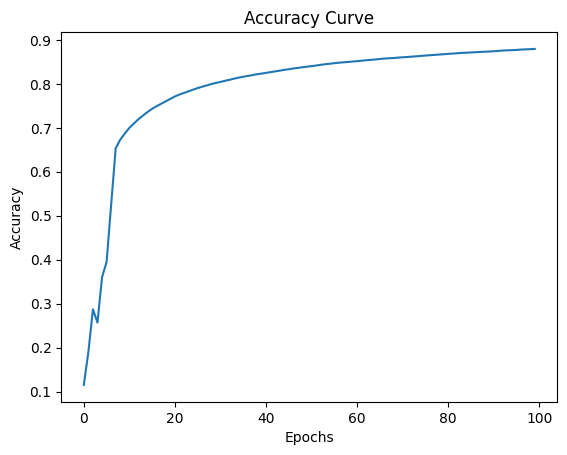

In [15]:
visualization.plot_accuracy_curve(accuracies)

In [16]:
val_prediction = evaluation.classification_validation_predictions(X_val, weights, biases)
print(f"The validation accuracy is {evaluation.accuracy(val_prediction, Y_val) * 100}")

The validation accuracy is 84.25
